# ANALÍTICA PREDICTIVA: CLASIFICACIÓN CALIDAD DE VINOS BLANCOS Y ROJOS.

## Elaborado por : Sergio Marín Pérez.
### semarinp@unal.edu.co

#### Asignatura: Analítica Predictiva.
#### Docente: Juan David Velásquez.

#### Especialización en Analítica.
#### Universidad Nacional de Colombia.
#### Facultad de Minas.

## 0. El Dataset.

Los dos datasets que se analizarán en este trabajo están relacionados con el **"Vinho Verde"** de origen Portugués y sus dos clases, vino blanco y vino rojo.

Ambos Datasets contienen 11 atributos de calidad los cuales fueron obtenidos bajo análisis fisicoquímicos y un atributo de calidad (EL target) el cual corresponde a un análisis sensorial realizado por expertos y que clasifica los vinos en un rango entre 0 y 10, siendo 0 un vino de baja calidad y 10 un vino de excelente calidad.


**Fuente:** https://archive.ics.uci.edu/ml/datasets/Wine+Quality

P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. Modeling wine preferences by data mining from physicochemical properties. In Decision Support Systems, Elsevier, 47(4):547-553, 2009.


** Características de la data:**

Number of Instances: red wine - 1599; white wine - 4898. 

Number of Attributes: 11 + output attribute
  
Attribute information:

   Input variables (based on physicochemical tests):
   1 - fixed acidity
   2 - volatile acidity
   3 - citric acid
   4 - residual sugar
   5 - chlorides
   6 - free sulfur dioxide
   7 - total sulfur dioxide
   8 - density
   9 - pH
   10 - sulphates
   11 - alcohol
   Output variable (based on sensory data): 
   12 - quality (score between 0 and 10)

Missing Attribute Values: None

## 0. Las Librerías básicas.

In [2]:
import warnings as ws
ws.filterwarnings("ignore")

from urllib.request import urlretrieve
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# 1. Comprensión del negocio.

## 1.1 Determinación de los objetivos comerciales.

Se desea construir un modelo que permita clasificar la calidad de ambas variedades de "Vinho Verde" (Blanco y Rojo) basados en los análisis físico-químicos de cada muestra sin necesidad de recurrir a expertos para su clasificación.


## 1.2 Valoración de la situación.



** Supuesto 1:** Al momento de recopilación de la información para este Dataset la producción del "Vinho Verde" en su variación Tinto presentaba un decrecimiento desde los años 60 y de forma contraria la variación de vino White o Blanco presenta un incremento hasta finales de los años 90 en donde ambas variaciones nivelan su producción.

Para ambas variaciones es fundamental el control de calidad y el garantizar que dicho control este de la mano con las características fisicoquímicas sin necesidad de que expertos basados en sus sentidos.

Como en todo proceso productivo, el objetivo es producir productos de alta calidad y sobre todo con una calidad estable y medible, de tal modo que durante el proceso se detecte cualquier desviación de los parámetros de calidad y que estos puedan ser ajustados para corregir y producir la calidad deseada.

Este modelo debe cumplir esos objetivos:

** 1.** Con base en las mediciones fisicoquímicas poder clasificar la calidad del vino en etapas tempranas del proceso de modo que se pueda corregir o nivelar dichas características para garantizar la producción de un vino de óptima calidad.

** 2.** Sustituir la clasificación de calidad realizada por expertos basados en su experiencia, conocimiento y juicios subjetivos por una clasificación objetiva basado en mediciones objetivas y principalmente que cualquier funcionario debidamente entrenado pueda utilizar.


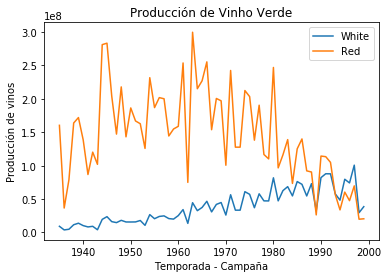

In [4]:
whine_production = pd.read_csv('whine Verde Production.csv', index_col = 0, sep = ';',encoding="ISO-8859-1")

Production = whine_production[['White', 'Red']]

Production.plot()
plt.xlabel("Temporada - Campaña")
plt.ylabel("Producción de vinos")
plt.title("Producción de Vinho Verde")
plt.legend()
plt.show()

## 1.3 Objetivos del Data Mining.

Desarrollar y ejecutar un modelo de predicción que con base en las 11 características fisicoquímicas tomadas de cada muestra sea posible determinar la calidad del "Vinho Verde" en una escala del 0 al 9. Dicho modelo de predicción debe estar soportado en 4 diferentes algoritmos de Clasificación en donde se pueda comparar la precisión de la predicción de cada algoritmo utilizado.

# 2. Comprensión de los datos.

## 2.1 Recolectar los datos iniciales.

Los datos fueron descargados del portal https://archive.ics.uci.edu/ml/datasets/Wine+Quality.

**Los dataset son importados directamente desde el repositorio web gracias a la librería urllib.**

Ambos archivos serán importados como Data Frame bajo la librería Pandas.

In [3]:
url_red = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'
url_white = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv'

df_vinos_tinto = pd.read_csv(url_red, sep = ';')
df_vinos_blancos = pd.read_csv(url_white, sep = ';')

print(type(df_vinos_blancos))
print(type(df_vinos_tinto))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


## 2.2 Descripción de los datos.

En esta fase se describirán los datos de ambos tipos de vino.

1. Se imprimirán los primeros 5 registros de cada dataset con el objetivo de conocer los datos y sus escalas de medición.

2. Se imprimirá la información de cada conjunto de datos para conocer la cantidad de registros, el número de valores nulos y el tipo de dato de cada característica.

3. Se imprimirá a descripción estadística de cada set de datos en donde se podrá apreciar, que cada variable tiene una escala de medición muy diferente a otras variables, por lo que más adelante se escalarán dichos valor para garantizar uniformidad en las escalas de valores.


In [6]:
df_vinos_blancos.head(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.50,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.90,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.00,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.70,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.60,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.50,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [7]:
df_vinos_tinto.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
df_vinos_blancos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [9]:
df_vinos_tinto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [10]:
df_vinos_blancos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [11]:
df_vinos_tinto.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## 2.3 EDA. (Exploratory Data Analysis) - Exploración y análisis de los datos.

En esta fase conoceremos como la variable objetivo 'quality' esta distribuida y como se relaciona con las 11 variables fisicoquímicas del dataset, con esta información conoceremos los datos y sus relaciones de modo que nos permitan ser mas asertivos en el análisis y en la toma de decisiones.

#### 2.3.1 Conozcamos nuestra variable objetivo: Calidad.

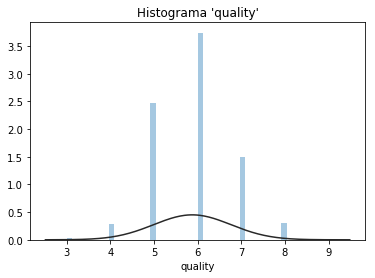

In [12]:
# Histograma de la variable 'quality' y su distribución.

## Vino Blanco.

hqb = sns.distplot(df_vinos_blancos['quality'],fit=norm, kde=False);
hqb.set_title("Histograma 'quality'")
plt.show()

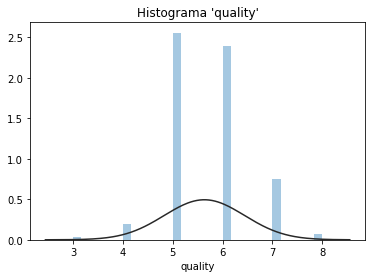

In [13]:
# Histograma de la variable 'quality' y su distribución.

## Vino Tinto..


hqt = sns.distplot(df_vinos_tinto['quality'],fit=norm, kde=False);
hqt.set_title("Histograma 'quality'")
plt.show()

In [14]:
print('Tabla de frecuencia Vino Blanco:')
print(pd.crosstab(index=df_vinos_blancos['quality'],columns="count"))


print('Tabla de frecuencia Vino Tinto:')
print(pd.crosstab(index=df_vinos_tinto['quality'],columns="count"))

Tabla de frecuencia Vino Blanco:
col_0    count
quality       
3           20
4          163
5         1457
6         2198
7          880
8          175
9            5
Tabla de frecuencia Vino Tinto:
col_0    count
quality       
3           10
4           53
5          681
6          638
7          199
8           18


Como se puede observar en los histogramas y en la tabla de frecuencia se puede concluir que los vinos blancos tienen una concentración en la calidad 5,6 y 7 mientras que la variedad de vino Tinto esta concentrado en los niveles 5 y 6.

Para tener una mayor visibilidad y comprensión de como se comportan la variable acumulativamente analizaremos el gráfico **ECDF Empirical cumulative distribution function**.

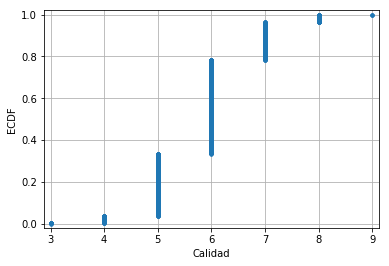

In [15]:
# Crear un gráfico ECDF para vinos Blancos.

#Se crea el np.array x y se ordena la columna 'quality'
x = np.sort(df_vinos_blancos['quality'])

# Se crea el eje y con np.arange el cual distribuye los valores del intervalo 
# en espacios iguales.
y = np.arange(1, len(x)+1)/len(x)

# Se crea el grafico con Matplotlib.
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Calidad')
_ = plt.ylabel('ECDF')
_ = plt.grid()
plt.margins(0.02)

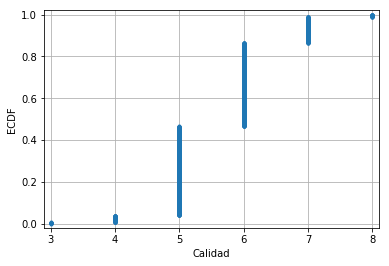

In [16]:
# Crear un gráfico ECDF para vinos Tintos.

#Se crea el np.array x y se ordena la columna 'quality'
x = np.sort(df_vinos_tinto['quality'])

# Se crea el eje y con np.arange el cual distribuye los valores del intervalo 
# en espacios iguales.
y = np.arange(1, len(x)+1)/len(x)

# Se crea el grafico con Matplotlib.
_ = plt.plot(x,y, marker = '.', linestyle = 'none')
_ = plt.xlabel('Calidad')
_ = plt.ylabel('ECDF')
_ = plt.grid()
plt.margins(0.02)

Para una mayor claridad se grafica la ECDF que es la Empirical cumulative density function la cual permite observar como de distribuyen los datos, es decir, de este grafico podemos concluir:

En los vinos blancos menos del 40% de los datos obtienen calificación de calidad de 5 y que el 80% de los datos tiene calificación menor o igual que 6.

En los vinos Tinto podemos concluir que el 86% de las muestras tienen calificación entre 3 y 6.

#### 2.3.2 Análisis de la variable categorica ('quality') versus variables numericas.

En esta fase se analizará la correlación entre la variable 'quality' y las demas variables del dataset mediante la matrix de correlación, la matrix de calor y correlaciones entre algunas variables númericas.

In [24]:
# Heat map (librería seaborn)

# se crea la matriz de correlación con la función .corr() de Pandas
corrmat =  df_vinos_blancos.corr()

k = 12 #numero de variables para el grafico. Pueden ser las 5 con corr mas positiva
# ó las 12 variables para analizar las correlaciones negativas.

# se obtienen los datos de las columnas que se quieren analizar según el k elegido
cols =  corrmat.nlargest(k, 'quality')['quality'].index

# se crea la matrizx de correlacion con Numpy
cm = np.corrcoef(df_vinos_blancos[cols].values.T) 
print(cm)
print(corrmat)
# se inicia creación de gráfico con seaborn
#sns.set(font_scale=2) 

#plt.figure(figsize = (20,10))
#hmb = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':20},yticklabels=cols.values, xticklabels=cols.values)
#hmb.set_title('HeatMap Vinos Blancos')
#plt.show()

[[ 1.00000000e+00  4.35574715e-01  9.94272457e-02  5.36778771e-02
   8.15806712e-03 -9.20909088e-03 -9.75768289e-02 -1.13662831e-01
  -1.74737218e-01 -1.94722969e-01 -2.09934411e-01 -3.07123313e-01]
 [ 4.35574715e-01  1.00000000e+00  1.21432099e-01 -1.74327719e-02
  -2.50103941e-01 -7.57287301e-02 -4.50631222e-01 -1.20881123e-01
  -4.48892102e-01  6.77179428e-02 -3.60188712e-01 -7.80137621e-01]
 [ 9.94272457e-02  1.21432099e-01  1.00000000e+00  1.55951497e-01
  -6.17796140e-04 -1.63748211e-01 -1.94133454e-01 -4.25858291e-01
   2.32097177e-03 -3.19153683e-02 -9.04394560e-02 -9.35914935e-02]
 [ 5.36778771e-02 -1.74327719e-02  1.55951497e-01  1.00000000e+00
   5.92172458e-02  6.23309403e-02 -2.66643659e-02 -1.71429850e-02
   1.34562367e-01 -3.57281469e-02  1.67628837e-02  7.44931485e-02]
 [ 8.15806712e-03 -2.50103941e-01 -6.17796140e-04  5.92172458e-02
   1.00000000e+00  9.40772210e-02  2.99098354e-01 -4.93958591e-02
   6.15500965e-01 -9.70119393e-02  1.01392352e-01  2.94210411e-01]
 [-9.

In [1]:
# Heat map (librería seaborn)

# se crea la matriz de correlación con la función .corr() de Pandas
corrmat =  df_vinos_tinto.corr()

k = 12 #numero de variables para el grafico. Pueden ser las 5 con corr mas positiva
# ó las 12 variables para analizar las correlaciones negativas.

# se obtienen los datos de las columnas que se quieren analizar según el k elegido
cols =  corrmat.nlargest(k, 'quality')['quality'].index

# se crea la matrizx de correlacion con Numpy
cm = np.corrcoef(df_vinos_tinto[cols].values.T) 
cm
# se inicia creación de gráfico con seaborn
sns.set(font_scale=2) 

plt.figure(figsize = (20,10))
hmb = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f',annot_kws={'size':20},yticklabels=cols.values, xticklabels=cols.values)
hmb.set_title('HeatMap Vinos Tintos')
plt.show()

NameError: name 'df_vinos_tinto' is not defined

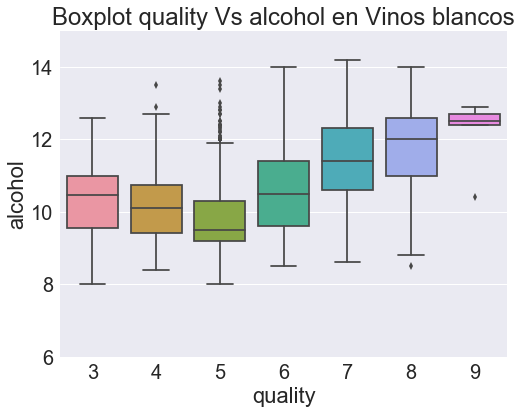

In [18]:
# Boxplot alcohol/quality en vinos blancos

# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos_blancos['alcohol'], df_vinos_blancos[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='alcohol', data=data)
fig.set_title('Boxplot quality Vs alcohol en Vinos blancos')
fig.axis(ymin=6,ymax=15);

Existe una correlación positiva entre el nivel de alcohol en los vinos blancos y la calidad del mismo, los vinos con calidad 7,8 y 9 presentan mayor nivel de alcohol, sin embargo no es la característica definitiva para clasificar la calidad de un vino.

Se observa igualmente un comportamiento contrario en los vinos de baja calidad (3,4 y 5) en donde el nivel de alcohol disminye a medida que aumenta la calidad del mismo.

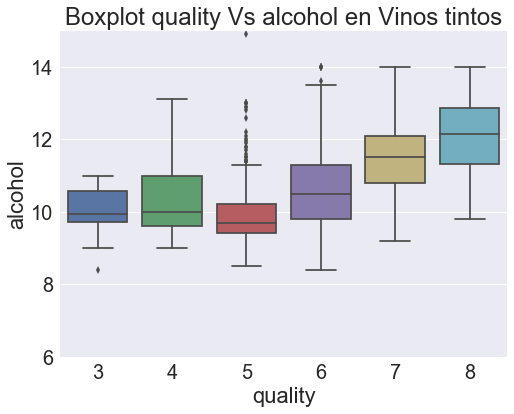

In [19]:
# Boxplot alcohol/quality en vinos tintos

# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos_tinto['alcohol'], df_vinos_tinto[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='alcohol', data=data)
fig.set_title('Boxplot quality Vs alcohol en Vinos tintos')
fig.axis(ymin=6,ymax=15);

Se oberva un comportamiento similar al de los vinos blancos, a partir de la calidad 6 si el grado de alcohol aumenta la calidad también, sin embargo, en los niveles inferiores el grado de alcohol no influye en la calidad.

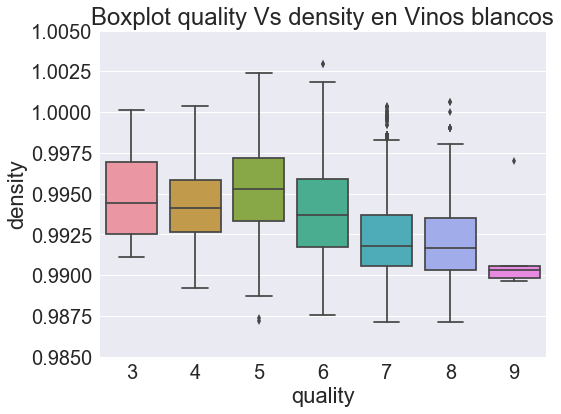

In [20]:
# Boxplot density/quality en vivnos blancos


# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos_blancos['density'], df_vinos_blancos[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='density', data=data)
fig.set_title('Boxplot quality Vs density en Vinos blancos')
fig.axis(ymin=0.985,ymax=1.005);

Definitivamente hay una correlación negativa entre la densidad y la calidad del vino, los vinos de mayor calidad son menos densos que los vinos de menor calidad, sin embargo, hay vinos de densidad entre 0.9875 y 0.9900 que son de calidad 4. Por esto no es la única característica que nos define la calidad de un vino blanco.

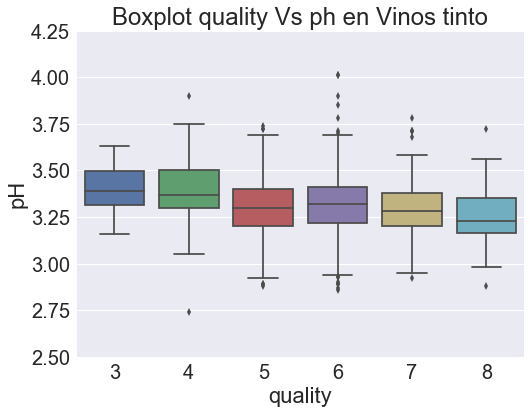

In [21]:
# Boxplot density/ph en vivnos tintos


# Se crea la variable
var = 'quality'

# Se crea el DataFrame con las dos variables a analizar.
data = pd.concat([df_vinos_tinto['pH'], df_vinos_tinto[var]], axis = 1)

# Se crea el boxplot con seaborn, requiere tres argumentos, la variable x, la y y la data.
f, ax = plt.subplots(figsize = (8,6))
fig = sns.boxplot(x=var, y='pH', data=data)
fig.set_title('Boxplot quality Vs ph en Vinos tinto')
fig.axis(ymin=2.50,ymax=4.25);

#### Relación entre variables númericas dataset vinos Blancos.

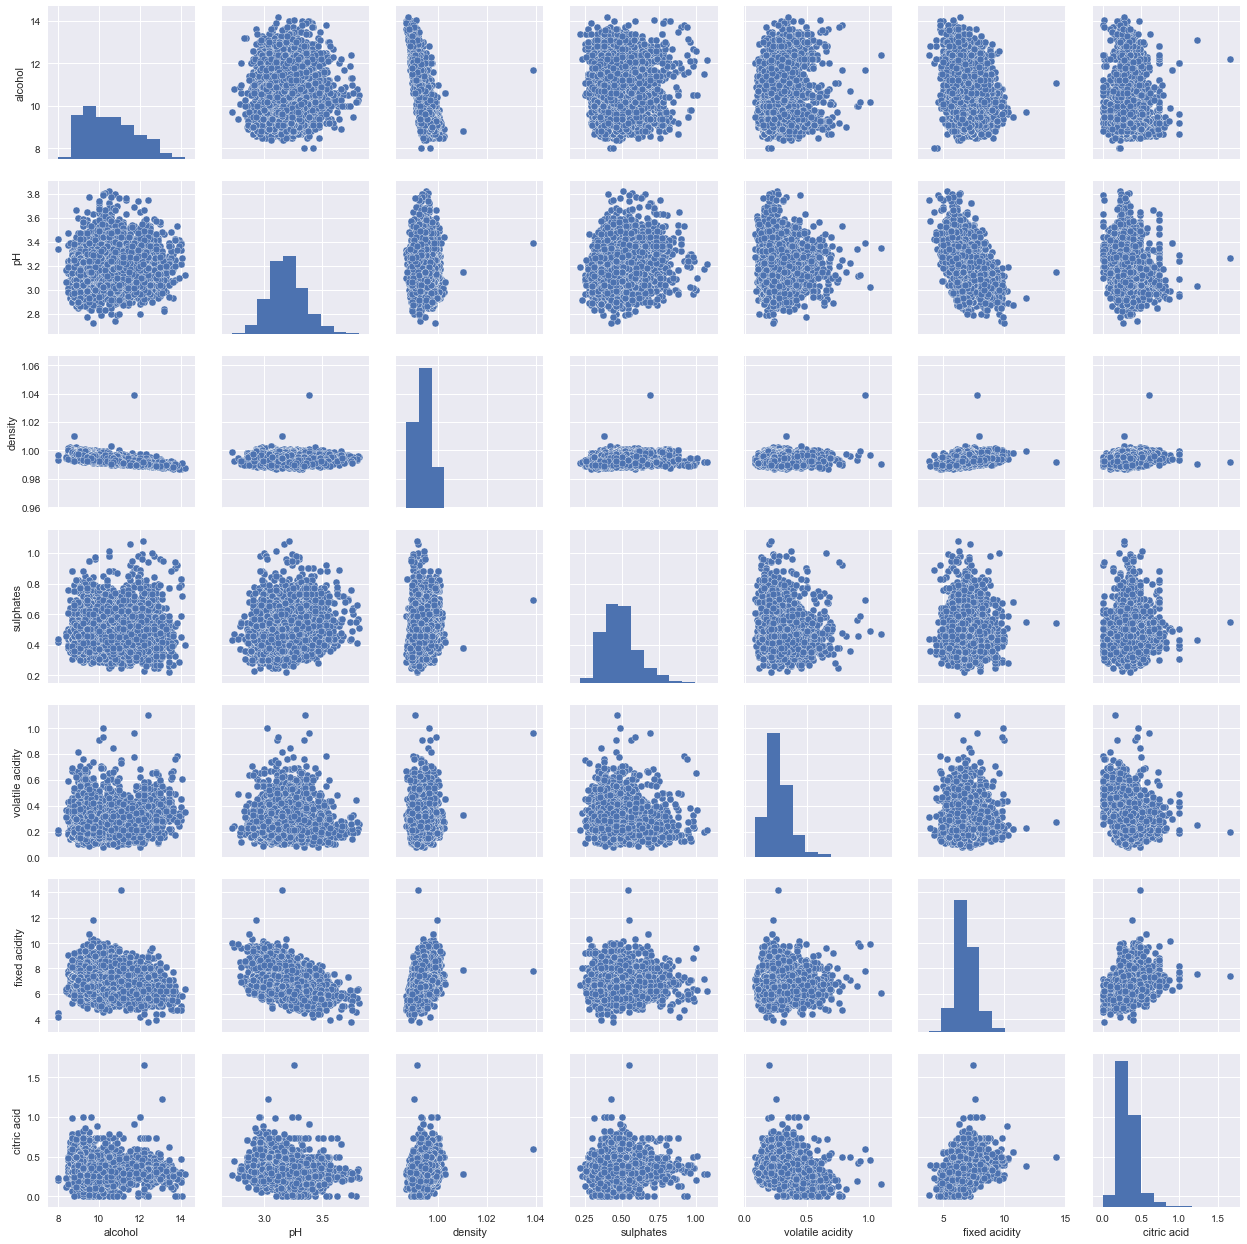

In [41]:
#Scatterplots

sns.set()
cols = ['alcohol','pH','density','sulphates','volatile acidity','fixed acidity','citric acid']
sns.pairplot(df_vinos_blancos[cols], size=2.5)
plt.show()

#### Relación entre variables númericas dataset vinos Tinto.

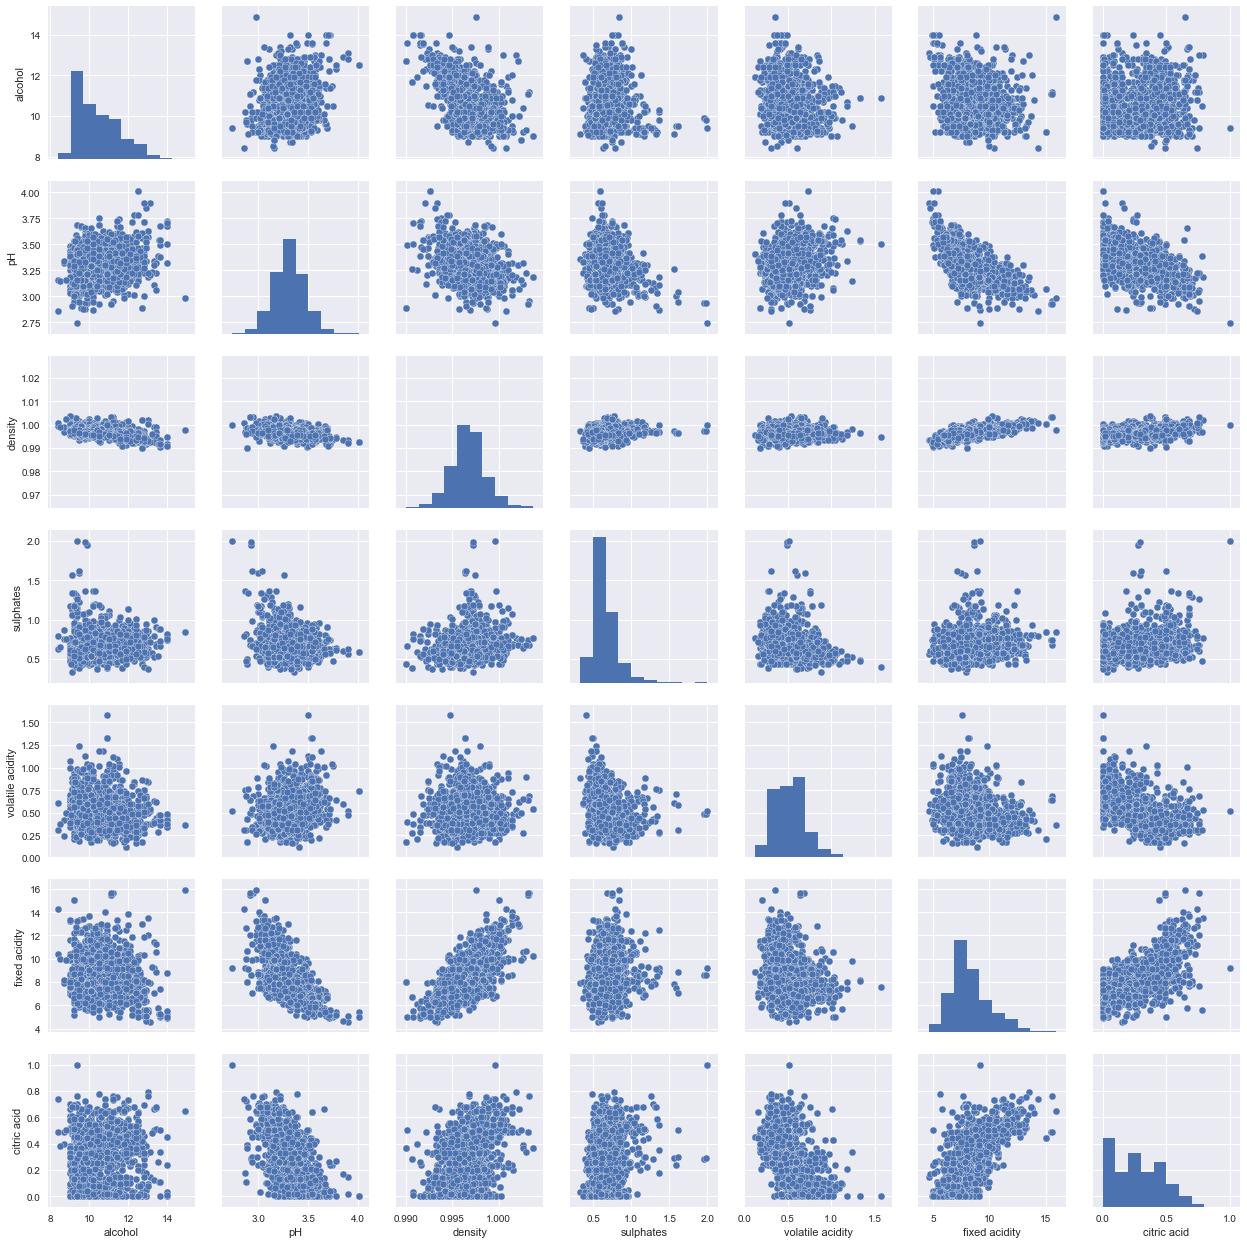

In [42]:
#Scatterplots

sns.set()
cols = ['alcohol','pH','density','sulphates','volatile acidity','fixed acidity','citric acid']
sns.pairplot(df_vinos_tinto[cols], size=2.5)
plt.show()

## 2.4 Verificación de la calidad de los datos.

In [22]:
df_vinos_blancos.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4851,6.4,0.33,0.44,8.90,0.055,52.0,164.0,0.99488,3.10,0.48,9.6,5
4243,6.8,0.26,0.26,2.00,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,6
2652,7.3,0.22,0.31,2.30,0.018,45.0,80.0,0.98936,3.06,0.34,12.9,7
1404,9.0,0.31,0.48,6.60,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,5
3875,7.4,0.22,0.27,1.60,0.057,45.0,98.0,0.99299,3.29,0.44,9.9,7
2230,7.1,0.20,0.36,11.60,0.042,45.0,124.0,0.99700,2.92,0.59,9.5,7
1088,7.4,0.20,0.37,16.95,0.048,43.0,190.0,0.99950,3.03,0.42,9.2,6
213,6.7,0.13,0.29,5.30,0.051,31.0,122.0,0.99440,3.44,0.37,9.7,6
1154,7.9,0.16,0.30,4.80,0.037,37.0,171.0,0.99670,3.47,0.44,9.0,4
967,6.8,0.22,0.35,17.50,0.039,38.0,153.0,0.99940,3.24,0.42,9.0,6


In [23]:
conteo_NaN_vinos_blancos = df_vinos_blancos.isnull().sum()

print(conteo_NaN_vinos_blancos)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [24]:
df_vinos_tinto.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1540,6.2,0.52,0.08,4.4,0.071,11.0,32.0,0.99646,3.56,0.63,11.6,6
950,8.9,0.12,0.45,1.8,0.075,10.0,21.0,0.99552,3.41,0.76,11.9,7
101,7.8,0.50,0.30,1.9,0.075,8.0,22.0,0.99590,3.31,0.56,10.4,6
1151,6.1,0.58,0.23,2.5,0.044,16.0,70.0,0.99352,3.46,0.65,12.5,6
1419,7.7,0.64,0.21,2.2,0.077,32.0,133.0,0.99560,3.27,0.45,9.9,5
1198,7.7,0.26,0.26,2.0,0.052,19.0,77.0,0.99510,3.15,0.79,10.9,6
968,9.0,0.40,0.43,2.4,0.068,29.0,46.0,0.99430,3.20,0.60,12.2,6
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.99780,3.35,0.80,10.5,5
792,7.1,0.61,0.02,2.5,0.081,17.0,87.0,0.99745,3.48,0.60,9.7,6
467,8.8,0.46,0.45,2.6,0.065,7.0,18.0,0.99470,3.32,0.79,14.0,6


In [25]:
conteo_NaN_vinos_tinto = df_vinos_tinto.isnull().sum()

print(conteo_NaN_vinos_tinto)

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


## 3. Preparación de los datos.

## 3.1 Estructurar los datos.

** Conformación del set de entrenamiento y del set de pruebas**

In [48]:
from sklearn import preprocessing

In [49]:
y_blancos = df_vinos_blancos['quality'].values
x_blancos = df_vinos_blancos.drop('quality', axis=1).values


y_tinto = df_vinos_tinto['quality'].values
x_tinto = df_vinos_tinto.drop('quality', axis=1).values


In [50]:
print(y_blancos.shape)
print(x_blancos.shape)

print(y_tinto.shape)
print(x_tinto.shape)

(4898,)
(4898, 11)
(1599,)
(1599, 11)


In [51]:
scaler = preprocessing.StandardScaler()
x_blancos_scl = scaler.fit_transform(x_blancos)
x_blancos_scl

array([[ 1.72096961e-01, -8.17699008e-02,  2.13280202e-01, ...,
        -1.24692128e+00, -3.49184257e-01, -1.39315246e+00],
       [-6.57501128e-01,  2.15895632e-01,  4.80011213e-02, ...,
         7.40028640e-01,  1.34184656e-03, -8.24275678e-01],
       [ 1.47575110e+00,  1.74519434e-02,  5.43838363e-01, ...,
         4.75101984e-01, -4.36815783e-01, -3.36667007e-01],
       ...,
       [-4.20473102e-01, -3.79435433e-01, -1.19159198e+00, ...,
        -1.31315295e+00, -2.61552731e-01, -9.05543789e-01],
       [-1.60561323e+00,  1.16673788e-01, -2.82557040e-01, ...,
         1.00495530e+00, -9.62604939e-01,  1.85757201e+00],
       [-1.01304317e+00, -6.77100966e-01,  3.78559282e-01, ...,
         4.75101984e-01, -1.48839409e+00,  1.04489089e+00]])

### Detección y procesamiento de Outliers.

In [58]:
from sklearn.neighbors import LocalOutlierFactor

clf = LocalOutlierFactor(n_neighbors=20)
outliers_blancos = clf.fit_predict(x_blancos_scl)

x_blancos_out = pd.DataFrame(x_blancos_scl)
x_blancos_out['outliers'] = pd.Series(outliers_blancos, index=x_blancos_out.index)

x_blancos_out

,0,1,2,3,4,5,6,7,8,9,10,outliers
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,1
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,1
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,1
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,1
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203,1
5,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667,1
6,-0.776015,0.414339,-1.439511,0.120000,-0.035355,-0.312141,-0.055553,0.291789,-0.054751,-0.173921,-0.743008,1
7,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152,1
8,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276,1
9,1.475751,-0.577879,0.791757,-0.964483,-0.081131,-0.429751,-0.220283,-0.076030,0.210175,-0.349184,0.394746,1


In [59]:
print(pd.crosstab(index=x_blancos_out['outliers'],columns="count"))

col_0     count
outliers       
-1          490
 1         4408


#### Selección de características mas importantes para la clasificación.

In [7]:
# Import KNeighborsClassifier from sklearn.neighbors
from sklearn.neighbors import KNeighborsClassifier 

In [8]:
# Create a k-NN classifier with 6 neighbors: knn
knn = KNeighborsClassifier(n_neighbors = 20)

# Fit the classifier to the data
knn.fit(x_blancos_scl,y_blancos)

# Predict the labels for the training data X
y_pred = knn.predict(x_blancos_scl)

bl_predict = pd.DataFrame(x_blancos_scl[:1])
print(bl_predict.shape)

# Predict and print the label for the new data point X_new
new_prediction = knn.predict(bl_predict)
print("Prediction: {}".format(new_prediction))

(1, 11)
Prediction: [6]


In [15]:
from sklearn.model_selection import train_test_split

In [10]:
# DATOS ESCALADOS CON STANDAR SCALER

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(x_blancos_scl, y_blancos, test_size = 0.3, random_state=42)

# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

0.6136054421768707


## Metodologías de pronostico utilizadas.

1. K Nearest Neighbors
2. Suport Vector Machine
3. Decision tree
4. Random forest

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Definir los clasificadores para cada metodología
Modelos = ['K Nearest Neighbors', 'Support Vector Machine', 'Decision Tree', 'Random Forest']

clfs = [('knn', KNeighborsClassifier()), ('SVM' ,svm.SVC()), ('DecisionTree', DecisionTreeClassifier()),('RandomForest', RandomForestClassifier())]

parametros = [{'knn__n_neighbors': np.arange(1, 50)}, {'SVM__C':[1,10,100], 'SVM__gamma':[0.1, 0.01]}, {'DecisionTree__max_depth': [50, 100, 200]}, {'RandomForest__n_estimators': [50, 80, 100]}]


In [74]:
print(__doc__)

for key, value in enumerate(clfs):
    
    steps  = [('scaler', StandardScaler()), value]

    pipeline = Pipeline(steps)
            
    parameters = parametros[key]
      
    X_train, X_test, y_train, y_test = train_test_split(x_blancos, y_blancos, test_size = 0.2, random_state=21)

    cv = GridSearchCV(pipeline, param_grid = parameters)

    cv.fit(X_train, y_train)

    y_pred = cv.predict(X_test)

    print('MODELO: ', Modelos[key])

    print(cv.best_params_)

    print(cv.score(X_test, y_test))

    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))

Automatically created module for IPython interactive environment
MODELO:  K Nearest Neighbors
{'knn__n_neighbors': 1}
0.636734693877551
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.39      0.39      0.39        28
          5       0.65      0.64      0.64       289
          6       0.68      0.67      0.68       447
          7       0.64      0.60      0.62       177
          8       0.38      0.53      0.44        38
          9       0.00      0.00      0.00         0

avg / total       0.64      0.64      0.64       980

[[  0   0   1   0   0   0   0]
 [  0  11  10   6   1   0   0]
 [  0  12 185  80   8   4   0]
 [  1   5  75 301  46  19   0]
 [  0   0  15  44 107  10   1]
 [  0   0   0  12   6  20   0]
 [  0   0   0   0   0   0   0]]
MODELO:  Support Vector Machine
{'SVM__C': 10, 'SVM__gamma': 0.1}
0.5857142857142857
             precision    recall  f1-score   support

          3       0.00     

In [75]:
print(__doc__)

for key, value in enumerate(clfs):
    
    steps  = [('scaler', StandardScaler()), value]

    pipeline = Pipeline(steps)
            
    parameters = parametros[key]
      
    X_train, X_test, y_train, y_test = train_test_split(x_tinto, y_tinto, test_size = 0.2, random_state=21)

    cv = GridSearchCV(pipeline, param_grid = parameters)

    cv.fit(X_train, y_train)

    y_pred = cv.predict(X_test)

    print('MODELO: ', Modelos[key])

    print(cv.best_params_)

    print(cv.score(X_test, y_test))

    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))

Automatically created module for IPython interactive environment
MODELO:  K Nearest Neighbors
{'knn__n_neighbors': 1}
0.634375
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.18      0.12      0.15        16
          5       0.66      0.72      0.69       127
          6       0.68      0.60      0.64       131
          7       0.63      0.69      0.66        42
          8       0.25      0.33      0.29         3

avg / total       0.63      0.63      0.63       320

[[ 0  1  0  0  0  0]
 [ 1  2  8  5  0  0]
 [ 1  4 92 26  4  0]
 [ 0  4 35 79 12  1]
 [ 0  0  5  6 29  2]
 [ 0  0  0  1  1  1]]
MODELO:  Support Vector Machine
{'SVM__C': 1, 'SVM__gamma': 0.1}
0.60625
             precision    recall  f1-score   support

          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00        16
          5       0.62      0.79      0.69       127
          6       0.57      0.63 

## Categorización de la variable calidad según propuesta de niveles.

** Grados de calidad.**

Poor = 0 y correponde a calidades con valoración igual a 0,1,2,3 y 4.

Normal = 1 y correponde a calidades con valoración igual a 5,6 y 7.

Excellent = 2 y corresponde a calidades con valoración igual a 8 y 9.

In [7]:
print(type(y_tinto))
print(type(y_blancos))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


### Vino Blanco.

In [8]:
y_blanco_cal = y_blancos

unique, counts = np.unique(y_blanco_cal, return_counts=True)
dict(zip(unique, counts))

{3: 20, 4: 163, 5: 1457, 6: 2198, 7: 880, 8: 175, 9: 5}

In [9]:
for x in np.arange(0 , 5):
    y_blanco_cal[y_blanco_cal == x] = 0
    
for x in np.arange(5 , 8):
    y_blanco_cal[y_blanco_cal == x] = 1
    
for x in np.arange(8 , 10):
    y_blanco_cal[y_blanco_cal == x] = 2

In [10]:
unique, counts = np.unique(y_blanco_cal, return_counts=True)
dict(zip(unique, counts))

{0: 183, 1: 4535, 2: 180}

In [17]:
print(__doc__)

for key, value in enumerate(clfs):
    
    steps  = [('scaler', StandardScaler()), value]

    pipeline = Pipeline(steps)
            
    parameters = parametros[key]
      
    X_train, X_test, y_train, y_test = train_test_split(x_blancos, y_blanco_cal, test_size = 0.2, random_state=21)

    cv = GridSearchCV(pipeline, param_grid = parameters)

    cv.fit(X_train, y_train)

    y_pred = cv.predict(X_test)

    print('MODELO: ', Modelos[key])

    print(cv.best_params_)

    print(cv.score(X_test, y_test))

    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))

Automatically created module for IPython interactive environment
MODELO:  K Nearest Neighbors
{'knn__n_neighbors': 13}
0.9316326530612244
             precision    recall  f1-score   support

          0       0.50      0.03      0.06        29
          1       0.93      1.00      0.96       913
          2       0.00      0.00      0.00        38

avg / total       0.88      0.93      0.90       980

[[  1  28   0]
 [  1 912   0]
 [  0  38   0]]
MODELO:  Support Vector Machine
{'SVM__C': 100, 'SVM__gamma': 0.01}
0.9306122448979591
             precision    recall  f1-score   support

          0       0.43      0.10      0.17        29
          1       0.93      1.00      0.96       913
          2       0.00      0.00      0.00        38

avg / total       0.88      0.93      0.90       980

[[  3  26   0]
 [  4 909   0]
 [  0  38   0]]
MODELO:  Decision Tree
{'DecisionTree__max_depth': 50}
0.9020408163265307
             precision    recall  f1-score   support

          0       0

### Vino Tinto.

In [11]:
y_tinto_cal = y_tinto

unique, counts = np.unique(y_tinto_cal, return_counts=True)
dict(zip(unique, counts))

{3: 10, 4: 53, 5: 681, 6: 638, 7: 199, 8: 18}

In [12]:

for x in np.arange(0 , 5):
    y_tinto_cal[y_tinto_cal == x] = 0
    
for x in np.arange(5 , 8):
    y_tinto_cal[y_tinto_cal == x] = 1
    
for x in np.arange(8 , 10):
    y_tinto_cal[y_tinto_cal == x] = 2


In [13]:
unique, counts = np.unique(y_tinto_cal, return_counts=True)
dict(zip(unique, counts))

{0: 63, 1: 1518, 2: 18}

In [15]:
print(__doc__)

for key, value in enumerate(clfs):
    
    steps  = [('scaler', StandardScaler()), value]

    pipeline = Pipeline(steps)
            
    parameters = parametros[key]
      
    X_train, X_test, y_train, y_test = train_test_split(x_tinto, y_tinto_cal, test_size = 0.2, random_state=21)

    cv = GridSearchCV(pipeline, param_grid = parameters)

    cv.fit(X_train, y_train)

    y_pred = cv.predict(X_test)

    print('MODELO: ', Modelos[key])

    print(cv.best_params_)

    print(cv.score(X_test, y_test))

    print(classification_report(y_test, y_pred))

    print(confusion_matrix(y_test, y_pred))

Automatically created module for IPython interactive environment
MODELO:  K Nearest Neighbors
{'knn__n_neighbors': 14}
0.9375
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.94      1.00      0.97       300
          2       0.00      0.00      0.00         3

avg / total       0.88      0.94      0.91       320

[[  0  17   0]
 [  0 300   0]
 [  0   3   0]]
MODELO:  Support Vector Machine
{'SVM__C': 1, 'SVM__gamma': 0.1}
0.9375
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        17
          1       0.94      1.00      0.97       300
          2       0.00      0.00      0.00         3

avg / total       0.88      0.94      0.91       320

[[  0  17   0]
 [  0 300   0]
 [  0   3   0]]
MODELO:  Decision Tree
{'DecisionTree__max_depth': 100}
0.928125
             precision    recall  f1-score   support

          0       0.57      0.24      0.33        17
  